In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from datetime import datetime

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import os

def merge_bus_data(bus_routes, base_path):
    """
    여러 버스 노선의 1월부터 9월까지의 데이터를 월별로 병합하는 함수
    
    Parameters:
    bus_routes (list): 처리할 버스 노선 번호 리스트 (예: ['1112', '7727'])
    base_path (str): 데이터가 저장된 기본 경로
    """
    
    # 요일 매핑
    day_mapping = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 
                   4: '금요일', 5: '토요일', 6: '일요일'}
    
    for route in bus_routes:
        print(f"\n{route}번 버스 데이터 처리 중...")
        
        # 1월부터 9월까지 처리
        for month in range(1, 10):
            monthly_dfs = []  # 한 달치 데이터를 저장할 리스트
            
            # 해당 월의 마지막 날짜 계산
            _, last_day = calendar.monthrange(2024, month)
            
            # 해당 월의 모든 날짜에 대한 파일 경로 생성
            dates = [f'2024{str(month).zfill(2)}{str(day).zfill(2)}' 
                    for day in range(1, last_day + 1)]
            
            file_paths = [f'{base_path}/{route}/24년{month}월/{route}_{date[4:]}.csv' 
                         for date in dates]
            
            # 각 일자별 데이터 처리
            for file_path, date in zip(file_paths, dates):
                try:
                    # CSV 파일이 존재하는지 확인
                    if not os.path.exists(file_path):
                        print(f"경고: {file_path} 파일이 존재하지 않습니다.")
                        continue
                        
                    # CSV 파일 불러오기
                    df = pd.read_csv(file_path, encoding='cp949')
                    
                    # 날짜 컬럼 추가
                    df['날짜'] = int(date)
                    
                    # 요일 컬럼 추가
                    day_of_week = datetime.strptime(date, '%Y%m%d').weekday()
                    df['요일'] = day_mapping[day_of_week]
                    
                    # 컬럼 순서 변경 (날짜와 요일을 맨 앞으로)
                    columns = df.columns.tolist()
                    columns = ['날짜', '요일'] + [col for col in columns 
                             if col not in ['날짜', '요일']]
                    df = df[columns]
                    
                    # 불필요한 컬럼 제거
                    df = df.drop(['노선', '기종점'], axis=1)
                    
                    # '(경유)'로 끝나는 정류장 행 제거
                    df = df[~df['정류장명'].str.endswith('(경유)')]
                    
                    # 'Unnamed' 컬럼 제거
                    unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
                    if unnamed_cols:
                        df = df.drop(unnamed_cols, axis=1)
                    
                    monthly_dfs.append(df)
                    
                except Exception as e:
                    print(f"오류 발생 - {file_path}: {str(e)}")
            
            if monthly_dfs:
                # 월별 데이터 병합
                monthly_combined = pd.concat(monthly_dfs, ignore_index=True)
                
                # 저장 디렉토리 생성
                save_dir = f'{base_path}/{route}/합본'
                os.makedirs(save_dir, exist_ok=True)
                
                # 월별 데이터 저장
                save_path = f'{save_dir}/{route}_{month}월.csv'
                monthly_combined.to_csv(save_path, index=False, encoding='utf-8-sig')
                print(f"{month}월 데이터 저장 완료: {save_path}")
                print(f"데이터 크기: {monthly_combined.shape}")

# 사용 예시
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원'
bus_routes = ['1112']  # 처리할 버스 노선 리스트
merge_bus_data(bus_routes, base_path)


1112번 버스 데이터 처리 중...
1월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_1월.csv
데이터 크기: (1612, 28)
2월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_2월.csv
데이터 크기: (1508, 28)
3월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_3월.csv
데이터 크기: (1612, 28)
4월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_4월.csv
데이터 크기: (1560, 28)
5월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_5월.csv
데이터 크기: (1612, 28)
6월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_6월.csv
데이터 크기: (1560, 28)
7월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_7월.csv
데이터 크기: (1612, 28)
8월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_8월.csv
데이터 크기: (1612, 28)
9월 데이터 저장 완료: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/1112_9월.csv
데이터 크기: (1560, 28)


In [6]:
### 월별 데이터 하나로 병합


import pandas as pd
import os

# 기본 경로 설정
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'

# 결과를 저장할 빈 DataFrame 생성
merged_df = pd.DataFrame()

# 1월부터 9월까지 반복
for month in range(1, 10):
    # 파일명 생성
    filename = f'1112_{month}월.csv'
    file_path = os.path.join(base_path, filename)
    
    try:
        # CSV 파일 읽기
        df = pd.read_csv(file_path, encoding='utf-8')
        
        # 데이터 합치기
        merged_df = pd.concat([merged_df, df], ignore_index=True)
        print(f'{filename} 파일 병합 완료')
        
    except Exception as e:
        print(f'{filename} 파일 처리 중 오류 발생: {str(e)}')

try:
    # 결과 파일 저장
    output_path = os.path.join(base_path, '최종합본.csv')
    merged_df.to_csv(output_path, index=False, encoding='utf-8')
    print(f'\n모든 파일이 성공적으로 병합되어 {output_path}에 저장되었습니다.')
    print(f'총 {len(merged_df)}개의 행이 저장되었습니다.')
    
except Exception as e:
    print(f'파일 저장 중 오류 발생: {str(e)}')

1112_1월.csv 파일 병합 완료
1112_2월.csv 파일 병합 완료
1112_3월.csv 파일 병합 완료
1112_4월.csv 파일 병합 완료
1112_5월.csv 파일 병합 완료
1112_6월.csv 파일 병합 완료
1112_7월.csv 파일 병합 완료
1112_8월.csv 파일 병합 완료
1112_9월.csv 파일 병합 완료

모든 파일이 성공적으로 병합되어 /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/최종합본.csv에 저장되었습니다.
총 14248개의 행이 저장되었습니다.


In [7]:
### 순번 재정렬 코드


import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/최종합본.csv')

# 날짜별로 그룹화하고 각 그룹 내에서 정류장 순번을 0부터 시작하도록 재정렬
def reorder_stops(group):
    group = group.copy()
    # 기존 순서를 유지하면서 0부터 시작하는 새로운 순번 부여
    group['정류장순번'] = range(len(group))
    return group

# 날짜별로 그룹화하고 함수 적용
df_reordered = df.groupby('날짜', group_keys=False).apply(reorder_stops)

# 결과를 새로운 CSV 파일로 저장
output_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/최종합본.csv'
df_reordered.to_csv(output_path, index=False)

# 확인을 위한 출력
print("변경 전 첫째 날의 순번:", sorted(df[df['날짜'] == df['날짜'].iloc[0]]['정류장순번'].unique()))
print("변경 후 첫째 날의 순번:", sorted(df_reordered[df_reordered['날짜'] == df_reordered['날짜'].iloc[0]]['정류장순번'].unique()))
print(f"전체 고유 정류장 수: {len(df['정류장명'].unique())}")

변경 전 첫째 날의 순번: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 38, 40, 41, 42, 43, 44, 45, 46, 48, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
변경 후 첫째 날의 순번: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
전체 고유 정류장 수: 39


In [8]:
### 비운행시간 제거 코드

import pandas as pd
import os

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
data = pd.read_csv(os.path.join(base_path, '최종합본.csv'))

# 운행 시간대 정의
operating_hours = ['04시','05시','06시','07시','08시','09시','10시','11시','12시', '13시', '14시', '15시', '16시', '17시', 
                  '18시', '19시', '20시', '21시', '22시', '23시', '00시']

# 비운행 시간대 컬럼
non_operating_hours = ['01시', '02시', '03시']

# 비운행 시간대 데이터 0으로 설정
data[non_operating_hours] = 0

# 저장
data.to_csv(os.path.join(base_path, '최종합본.csv'), index=False)

In [9]:
import pandas as pd
import numpy as np
import os

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
data = pd.read_csv(os.path.join(base_path, '최종합본.csv'))
data['날짜'] = pd.to_datetime(data['날짜'], format='%Y%m%d')
# 1. 일별 정류장 수 확인
daily_station_count = data.groupby('날짜')['정류장순번'].nunique()
print("=== 일별 정류장 수 ===")
print(f"최소 정류장 수: {daily_station_count.min()}")
print(f"최대 정류장 수: {daily_station_count.max()}")
if daily_station_count.min() != daily_station_count.max():
    print("\n정류장 수가 다른 날짜:")
    inconsistent_dates = daily_station_count[daily_station_count != daily_station_count.mode()[0]]
    print(inconsistent_dates)

# 2. 정류장번호별 이름 변경 확인
station_names = data.groupby(['정류장순번', '정류장명']).size().reset_index()
station_changes = data.groupby('정류장순번')['정류장명'].nunique()
changed_stations = station_changes[station_changes > 1]

if len(changed_stations) > 0:
    print("\n=== 이름이 변경된 정류장 목록 ===")
    for station_id in changed_stations.index:
        names = data[data['정류장순번'] == station_id][['날짜', '정류장명']].drop_duplicates()
        print(f"\n정류장 순번 {station_id}:")
        for _, row in names.sort_values('날짜').iterrows():
            print(f"{row['날짜'].strftime('%Y-%m-%d')}: {row['정류장명']}")

# 3. 전체 기간 동안의 정류장별 운영 기간 확인
station_periods = pd.DataFrame()
for station_id in data['정류장순번'].unique():
    station_data = data[data['정류장순번'] == station_id]
    station_periods.loc[station_id, '정류장명'] = station_data['정류장명'].iloc[-1]
    station_periods.loc[station_id, '첫 운영일'] = station_data['날짜'].min()
    station_periods.loc[station_id, '마지막 운영일'] = station_data['날짜'].max()
    station_periods.loc[station_id, '운영 일수'] = len(station_data['날짜'].unique())

print("\n=== 정류장별 운영 기간 ===")
print(station_periods.sort_index())

# 4. 운영 일수가 다른 정류장 확인
max_days = station_periods['운영 일수'].max()
inconsistent_operation = station_periods[station_periods['운영 일수'] != max_days]

if len(inconsistent_operation) > 0:
    print("\n=== 전체 기간과 다른 운영 일수를 가진 정류장 ===")
    print(inconsistent_operation)

# 5. 날짜별 결측 정류장 확인
all_dates = pd.date_range(data['날짜'].min(), data['날짜'].max())
all_stations = data['정류장순번'].unique()

for date in all_dates:
    daily_stations = data[data['날짜'].dt.date == date.date()]['정류장순번'].unique()
    missing_stations = set(all_stations) - set(daily_stations)
    if missing_stations:
        print(f"\n{date.date()}: 누락된 정류장 {missing_stations}")

=== 일별 정류장 수 ===
최소 정류장 수: 52
최대 정류장 수: 52

=== 이름이 변경된 정류장 목록 ===

정류장 순번 43:
2024-01-01: 영통역8번출구
2024-01-02: 영통역8번출구
2024-01-03: 영통역8번출구
2024-01-04: 영통역8번출구
2024-01-05: 영통역8번출구
2024-01-06: 영통역8번출구
2024-01-07: 영통역8번출구
2024-01-08: 영통역8번출구
2024-01-09: 영통역8번출구
2024-01-10: 영통역8번출구
2024-01-11: 영통역8번출구
2024-01-12: 영통역8번출구
2024-01-13: 영통역8번출구
2024-01-14: 영통역8번출구
2024-01-15: 영통역8번출구
2024-01-16: 영통역8번출구
2024-01-17: 영통역8번출구
2024-01-18: 영통역8번출구
2024-01-19: 영통역8번출구
2024-01-20: 영통역8번출구
2024-01-21: 영통역8번출구
2024-01-22: 영통역8번출구
2024-01-23: 영통역8번출구
2024-01-24: 영통역8번출구
2024-01-25: 영통역8번출구
2024-01-26: 영통역8번출구
2024-01-27: 영통역8번출구
2024-01-28: 영통역8번출구
2024-01-29: 영통역8번출구
2024-01-30: 영통역8번출구
2024-01-31: 영통역8번출구
2024-02-01: 영통역8번출구
2024-02-02: 영통역8번출구
2024-02-03: 영통역8번출구
2024-02-04: 영통역8번출구
2024-02-05: 영통역8번출구
2024-02-06: 영통역8번출구
2024-02-07: 영통역8번출구
2024-02-08: 영통역8번출구
2024-02-09: 영통역8번출구
2024-02-10: 영통역8번출구
2024-02-11: 영통역8번출구
2024-02-12: 영통역8번출구
2024-02-13: 영통역8번출구
2024-02-14: 영통역8번출구
2024-02-15: 영통역8번출구
2

In [10]:

### 데이터 에러 수정 (이름 변경 등)

import pandas as pd
import os

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
data = pd.read_csv(os.path.join(base_path, '최종합본.csv'))
data['날짜'] = pd.to_datetime(data['날짜'], format='%Y%m%d')

# # 1. 80개 정류장이 있는 날짜 확인 및 수정
# daily_station_count = data.groupby('날짜')['정류장순번'].count()
# dates_with_80 = daily_station_count[daily_station_count > 79].index

# print("=== 80개 정류장이 있는 날짜 ===")
# print(dates_with_80)

# # 해당 날짜들의 마지막 정류장 행 삭제
# for date in dates_with_80:
#     # 해당 날짜의 데이터 중 가장 큰 정류장순번을 가진 행 찾기
#     max_station_idx = data[data['날짜'] == date]['정류장순번'].idxmax()
#     data = data.drop(max_station_idx)

# 2. 43번 정류장 이름 통일
data.loc[data['정류장순번'] == 43, '정류장명'] = '영통역8번출구.수원지방법원등기국'

# 결과 확인
print("\n=== 수정 후 확인 ===")
print("일별 정류장 수:")
print(data.groupby('날짜')['정류장순번'].count().value_counts())
print("\n43번 정류장 이름:")
print(data[data['정류장순번'] == 43]['정류장명'].unique())

# 수정된 데이터 저장
data.to_csv(os.path.join(base_path, '최종합본.csv'), index=False)

print("\n=== 저장 완료 ===")
print(f"저장된 파일 경로: {os.path.join(base_path, '최종합본.csv')}")
print(f"전체 행 수: {len(data)}")
print(f"고유 정류장 수: {data['정류장순번'].nunique()}")



=== 수정 후 확인 ===
일별 정류장 수:
정류장순번
52    274
Name: count, dtype: int64

43번 정류장 이름:
['영통역8번출구.수원지방법원등기국']

=== 저장 완료 ===
저장된 파일 경로: /Users/foxrainswap/Desktop/데이터/재차인원/1112/합본/최종합본.csv
전체 행 수: 14248
고유 정류장 수: 52


In [12]:
### 트레이닝세트 테스트 세트 분리
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import os

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
data = pd.read_csv(os.path.join(base_path, '최종합본.csv'))
data['날짜'] = pd.to_datetime(data['날짜'])  # format 파라미터 제거

# 운행 시간대 컬럼
operating_hours = ['04시','05시','06시','07시','08시','09시','10시','11시','12시', '13시', '14시', '15시', '16시', '17시', 
                  '18시', '19시', '20시', '21시', '22시', '23시', '00시']

# 월 정보 추출
data['월'] = data['날짜'].dt.month

# 데이터 분할 (1-7월: 학습, 8-9월: 테스트)
train_data = data[data['월'].between(1, 7)].copy()
test_data = data[data['월'].between(8, 9)].copy()

#데이터 저장
train_data.to_csv(os.path.join(base_path, '트레이닝셋_정규화x.csv'), index=False)
test_data.to_csv(os.path.join(base_path, '테스트셋_정규화x.csv'), index=False)


print("\n원본 데이터 운행시간대 범위:")
print(data[operating_hours].describe())
print("\n정규화 후 운행시간대 범위:")
print(data[operating_hours].describe())

print("\n=== 데이터 분할 결과 ===")
print(f"학습 데이터 기간: {train_data['날짜'].min()} ~ {train_data['날짜'].max()}")
print(f"테스트 데이터 기간: {test_data['날짜'].min()} ~ {test_data['날짜'].max()}")


원본 데이터 운행시간대 범위:
                04시           05시           06시           07시           08시  \
count  14248.000000  14248.000000  14248.000000  14248.000000  14248.000000   
mean       0.754071      2.019652      7.727611     12.270845     13.944413   
std        2.551144      3.831619     10.939550     13.950377     13.032282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      2.000000   
50%        0.000000      0.000000      3.000000      7.000000     11.000000   
75%        0.000000      2.000000     11.000000     19.000000     22.000000   
max       30.000000     27.000000     46.000000     46.000000     46.000000   

                09시           10시           11시           12시           13시  \
count  14248.000000  14248.000000  14248.000000  14248.000000  14248.000000   
mean      12.515371     10.390300      9.645845     10.294357      9.676516   
std       12.080962      9.688656

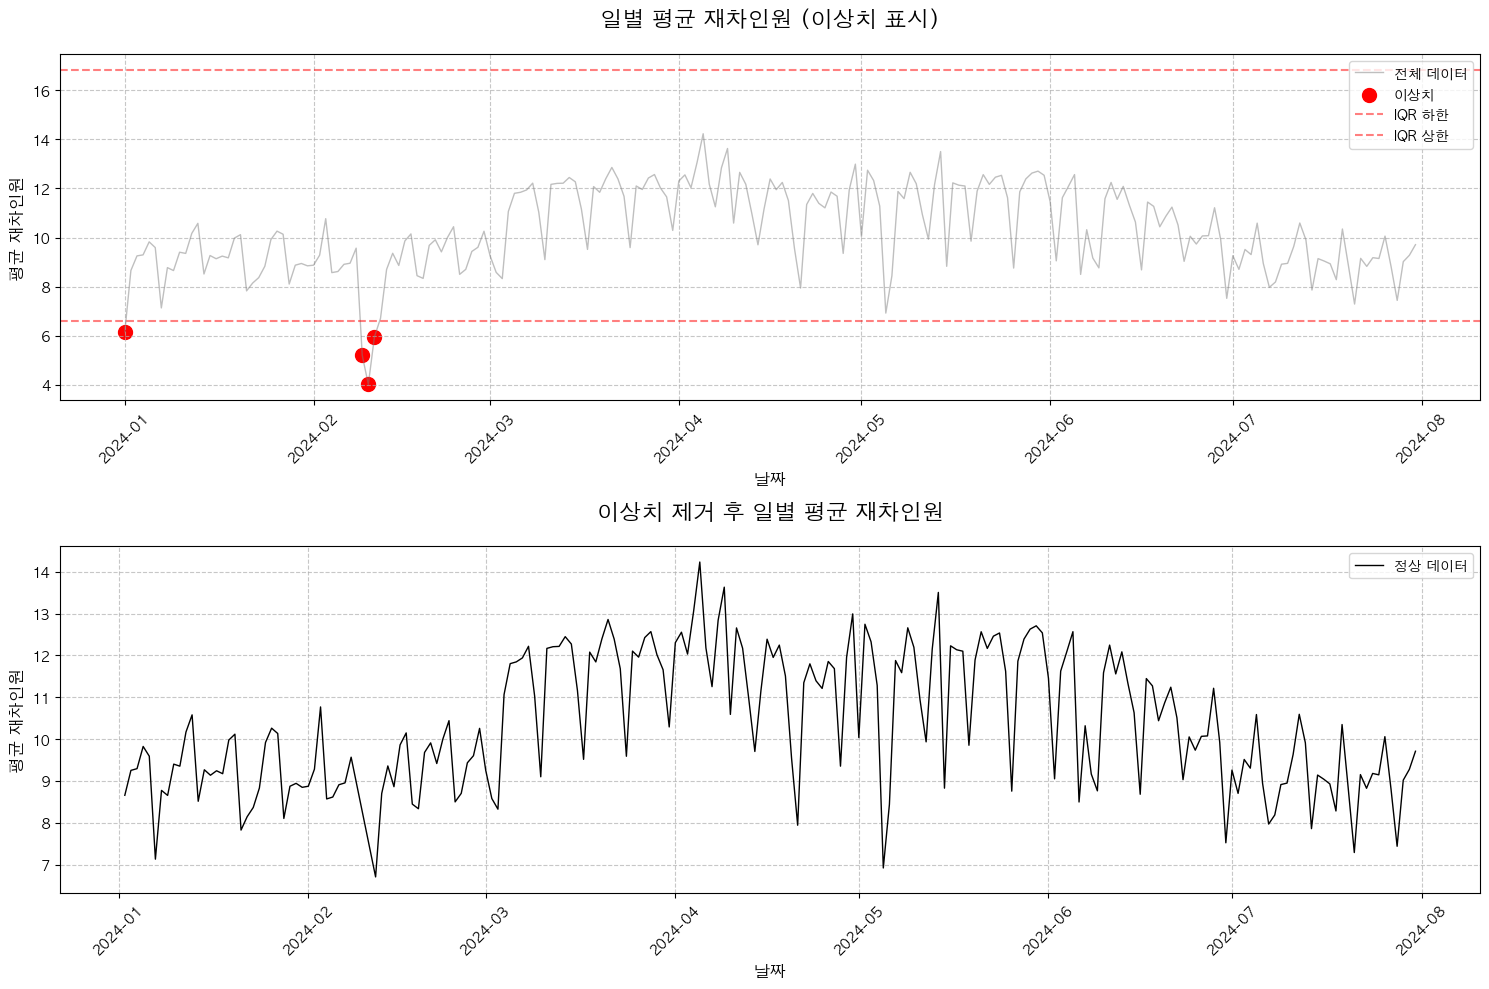

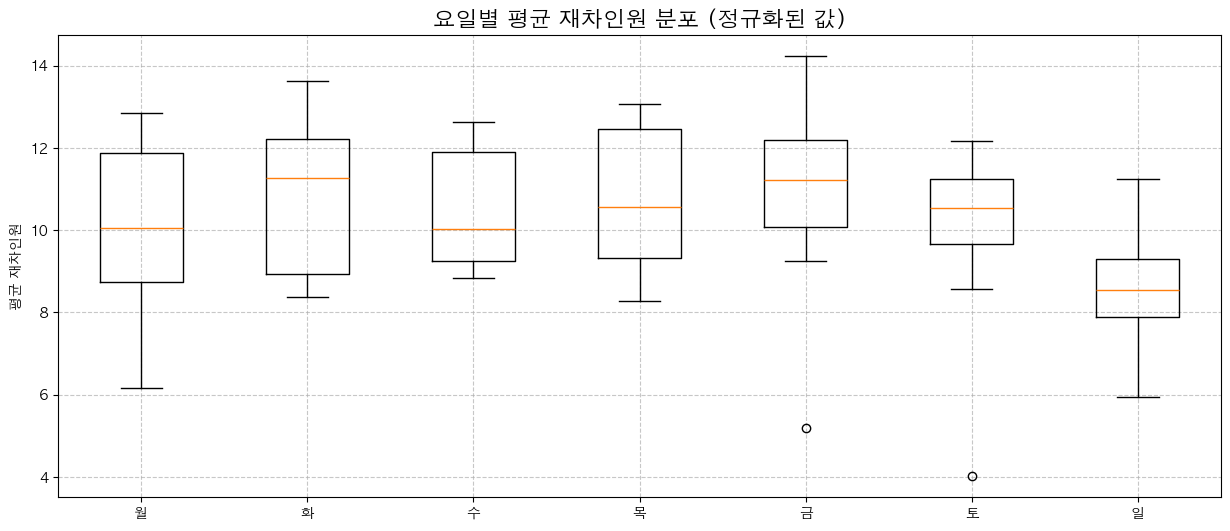


=== 이상치 분석 결과 ===
전체 데이터 수: 213
이상치 수: 4 (1.88%)
정상 데이터 수: 209 (98.12%)

IQR 범위 (정규화된 값):
하한값: 6.6167
상한값: 16.8474

이상치로 판별된 날짜:
          날짜   요일    평균재차인원
0 2024-01-01  월요일  6.162088
1 2024-02-09  금요일  5.198718
2 2024-02-10  토요일  4.016484
3 2024-02-11  일요일  5.953297


In [14]:
### 트레이닝 세트 이상치 탐지 및 제거

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
train_data = pd.read_csv(os.path.join(base_path, '트레이닝셋_정규화x.csv'))
train_data['날짜'] = pd.to_datetime(train_data['날짜'])

# 운행 시간대 정의
operating_hours = ['04시','05시','06시','07시','08시','09시','10시','11시','12시', '13시', '14시', '15시', '16시', '17시', 
                  '18시', '19시', '20시', '21시', '22시', '23시', '00시']

# 일별 평균 재차인원 계산 (정규화된 값으로)
daily_occupancy = train_data.groupby('날짜')[operating_hours].mean().mean(axis=1).reset_index()
daily_occupancy.columns = ['날짜', '평균재차인원']

def detect_outliers_iqr(data, column):
   """IQR 방식으로 이상치 탐지"""
   Q1 = data[column].quantile(0.25)
   Q3 = data[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 0.8 * IQR  # 낮은 값에 대해 더 엄격
   upper_bound = Q3 + 1.7 * IQR  # 높은 값에 대해 더 관대
   
   outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
   normal = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
   
   return outliers, normal, (lower_bound, upper_bound)

# 이상치 탐지
outliers, normal_data, bounds = detect_outliers_iqr(daily_occupancy, '평균재차인원')

# 1. 전체 데이터 시각화
plt.figure(figsize=(15, 10))

# 상단 그래프: 시계열 데이터와 이상치
plt.subplot(2, 1, 1)
plt.plot(daily_occupancy['날짜'], daily_occupancy['평균재차인원'], 
        color='gray', alpha=0.5, label='전체 데이터', linewidth=1)
plt.scatter(outliers['날짜'], outliers['평균재차인원'], 
          color='red', label='이상치', s=100)
plt.axhline(y=bounds[0], color='red', linestyle='--', alpha=0.5, label='IQR 하한')
plt.axhline(y=bounds[1], color='red', linestyle='--', alpha=0.5, label='IQR 상한')

plt.title('일별 평균 재차인원 (이상치 표시)', fontsize=16, pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('평균 재차인원', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)

# 하단 그래프: 이상치가 제거된 데이터
plt.subplot(2, 1, 2)
plt.plot(normal_data['날짜'], normal_data['평균재차인원'], 
        color='black', label='정상 데이터', linewidth=1)
plt.title('이상치 제거 후 일별 평균 재차인원', fontsize=16, pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('평균 재차인원', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. 요일별 박스플롯
plt.figure(figsize=(15, 6))
train_data['요일'] = pd.Categorical(train_data['요일'], 
                                 categories=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
daily_occupancy_with_day = daily_occupancy.merge(train_data[['날짜', '요일']].drop_duplicates(), on='날짜')
plt.boxplot([daily_occupancy_with_day[daily_occupancy_with_day['요일'] == day]['평균재차인원'] 
           for day in ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']],
          labels=['월', '화', '수', '목', '금', '토', '일'])
plt.title('요일별 평균 재차인원 분포 (정규화된 값)', fontsize=16)
plt.ylabel('평균 재차인원')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 이상치 통계 출력
print("\n=== 이상치 분석 결과 ===")
print(f"전체 데이터 수: {len(daily_occupancy)}")
print(f"이상치 수: {len(outliers)} ({len(outliers)/len(daily_occupancy)*100:.2f}%)")
print(f"정상 데이터 수: {len(normal_data)} ({len(normal_data)/len(daily_occupancy)*100:.2f}%)")
print("\nIQR 범위 (정규화된 값):")
print(f"하한값: {bounds[0]:.4f}")
print(f"상한값: {bounds[1]:.4f}")

# 이상치로 판별된 날짜들 출력
print("\n이상치로 판별된 날짜:")
outlier_details = outliers.merge(train_data[['날짜', '요일']].drop_duplicates(), on='날짜')
print(outlier_details[['날짜', '요일', '평균재차인원']].sort_values('날짜'))

# 이상치가 제거된 데이터 저장
cleaned_train = train_data[train_data['날짜'].isin(normal_data['날짜'])]
cleaned_train.to_csv(os.path.join(base_path, '트레이닝셋_정규화x_이상치제거.csv'), index=False)